In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
"""
Change directory to where this file is located
"""
%cd '/content/drive/MyDrive/MLVU/Project/Inference_With_Freq_Sent_Source'

/content/drive/MyDrive/MLVU/Project/Inference_With_Freq_Sent_Source


# Creating comparison videos

In [3]:
!sudo apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [34]:
!ffmpeg -i result_original_0.mp4 -i ./Testing_results/Comparison_10frames.mp4 -filter_complex hstack ./Testing_results/DoneComparison_10frames.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

# Loading in video as multiple frames

In [28]:
import imageio
from skimage.transform import resize
nr_of_vids = 3
driving_video_n = "./Testing_results/DoneComparison_10frames.mp4"
reader = imageio.get_reader(driving_video_n)
fps = reader.get_meta_data()['fps']
driving_video = []
try:
    for im in reader:
        driving_video.append(im)
except RuntimeError:
    pass
reader.close()
driving_video = [resize(frame, (256, 256*nr_of_vids))[..., :3] for frame in driving_video]

Text(0.5, 1.0, 'Frequency: 10 with ESRGAN                                Frequency: 20 with ESRGAN                           Frequency: 30 with ESRGAN')

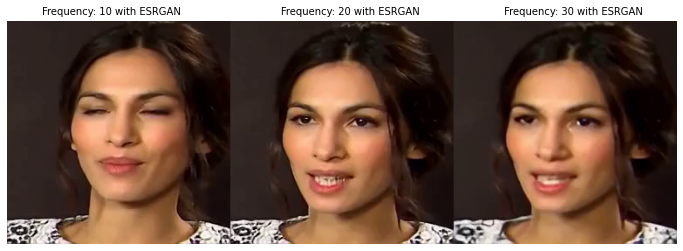

In [26]:
import matplotlib.pyplot as plt
import os
fig = plt.figure(figsize=(12,6), frameon=False)
plt.imshow(driving_video[0])
plt.axis('off')
plt.title("Frequency: 10 with ESRGAN                                Frequency: 20 with ESRGAN                           Frequency: 30 with ESRGAN", fontsize='medium')
plt.savefig("./Testing_results_with_title/TEST1.png",bbox_inches='tight', pad_inches=0)

In [27]:
import matplotlib.pyplot as plt
import os
name = driving_video_n.split("/")[2].split(".")[0]

if not os.path.exists("./Testing_results_with_title/"+name):
    os.makedirs("./Testing_results_with_title/"+name)


for i,frame in enumerate(driving_video):
  if i % 100 == 0:
    print(i)
  fig = plt.figure(figsize=(12,6), frameon=False)
  plt.imshow(frame)
  plt.title("Frequency: 10 with ESRGAN                                Frequency: 20 with ESRGAN                           Frequency: 30 with ESRGAN", fontsize='medium')
  plt.axis('off')
  plt.savefig("./Testing_results_with_title/"+name+"/"+name+"_frame"+str(i), bbox_inches='tight', pad_inches=0)
  plt.close(fig)

0
100
200
300
400
500
600
